In [1]:
# 雲端執行須執行這行，取得權限
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 第一份資料集

          Month Module      ID       400       405       410       415  \
0    2022-08-01     A3    6143  0.176616  0.151590  0.130344  0.117935   
1    2022-09-07     A2    6143  0.153549  0.131392  0.115701  0.099584   
2    2022-09-07     A1    6143  0.000000  0.000000  0.002516  0.009545   
3    2022-08-01     A3    6143  0.176168  0.151297  0.130152  0.117783   
4    2022-08-01     A1    6143  0.000000  0.000000  0.000000  0.002149   
...         ...    ...     ...       ...       ...       ...       ...   
4837 2022-12-01     A1  359647  0.000000  0.003755  0.011916  0.021720   
4838 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
4839 2022-12-01     A1  359647  0.000000  0.005293  0.013913  0.023781   
4840 2022-12-01     A1  359647  0.000000  0.005293  0.013913  0.023781   
4841 2022-12-01     A1  359647  0.000000  0.004270  0.012548  0.022340   

           420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  \
0     0.093648  0.065360  0.047938 

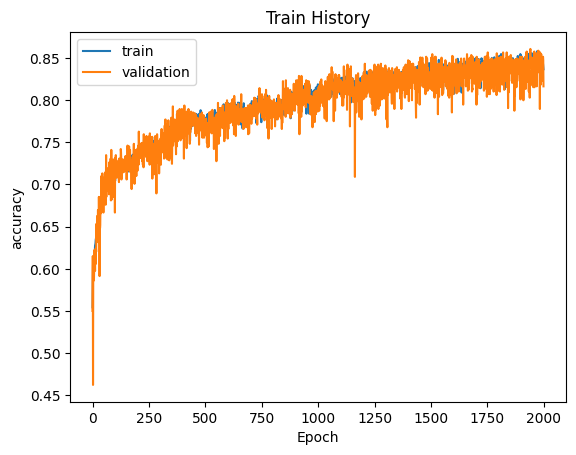

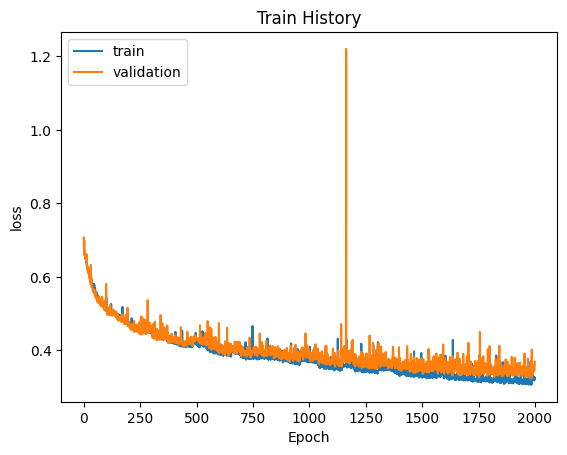

In [3]:
#第一份資料集
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_path = "/content/drive/MyDrive/20230419/Data/Testing1/Training Data_A1.xlsx"
data = pd.read_excel(data_path, index_col=False)
print(data)

import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
#ndarray = np.array(data, dtype=float)
ndarray = data.values
ndarray = shuffle(ndarray)
print(ndarray)
df_Features = ndarray[:,3:124]
print(df_Features.shape)
RBC_Label = ndarray[:,125]
# np.set_printoptions(threshold=sys.maxsize)
# print(data['RBC'])
RBC_Label[RBC_Label==2]=1
print(np.sum(RBC_Label))
print(RBC_Label)
# one hot encoding
labels = to_categorical(RBC_Label, num_classes=2)
print(labels)

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Dropout, BatchNormalization

#define the model
model=None
model = Sequential()
model.add(Input(shape=(121,)))
model.add(Dense(1024, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

print(model.summary())

from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()
std_df_Features = scalar.fit_transform(df_Features)
# std_df_Features=std_df_Features.T
# print(df_Features)
# print(std_df_Features)
# std_df_Features = normalize(df_Features, norm='l2')

# Create an optimizer with a specific learning rate
optimizer = keras.optimizers.Adam(weight_decay=5e-5)
optimizer = keras.optimizers.experimental.SGD(0.2, momentum=0.9)

# compile the model
model.compile(loss='categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])


# X = np.asarray(std_df_Features).astype(np.float32) 
train_history=None
train_history=model.fit( std_df_Features, labels, validation_split=0.2, epochs=2000, batch_size=32, verbose=2)

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [4]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        209  190
1        336  214

In [5]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing1/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict   0    1
Labels          
0        69  163
1        21  285

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0    1
Labels          
0        25   50
1        11  135

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0    1
Labels          
0        23  107
1        51   77

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict   0    1
Labels          
0        52  148
1         4  177

In [6]:
path = "/content/drive/MyDrive/20230419/Model/Testing1/"
model.save( path + "A1_RBC_epoch2000.h5" )

In [7]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# 第二份資料集

          Month Module      ID       400       405       410       415  \
0    2022-08-01     A3    6143  0.176616  0.151590  0.130344  0.117935   
1    2022-09-07     A2    6143  0.153549  0.131392  0.115701  0.099584   
2    2022-09-07     A1    6143  0.000000  0.000000  0.002516  0.009545   
3    2022-08-01     A3    6143  0.176168  0.151297  0.130152  0.117783   
4    2022-08-01     A1    6143  0.000000  0.000000  0.000000  0.002149   
...         ...    ...     ...       ...       ...       ...       ...   
4837 2022-12-01     A1  359647  0.000000  0.003755  0.011916  0.021720   
4838 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
4839 2022-12-01     A1  359647  0.000000  0.005293  0.013913  0.023781   
4840 2022-12-01     A1  359647  0.000000  0.005293  0.013913  0.023781   
4841 2022-12-01     A1  359647  0.000000  0.004270  0.012548  0.022340   

           420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  \
0     0.093648  0.065360  0.047938 

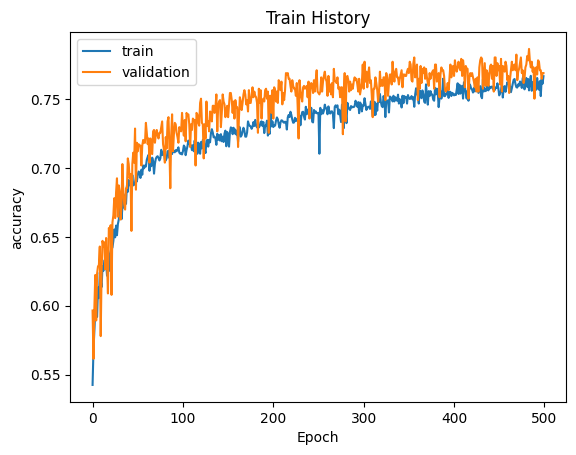

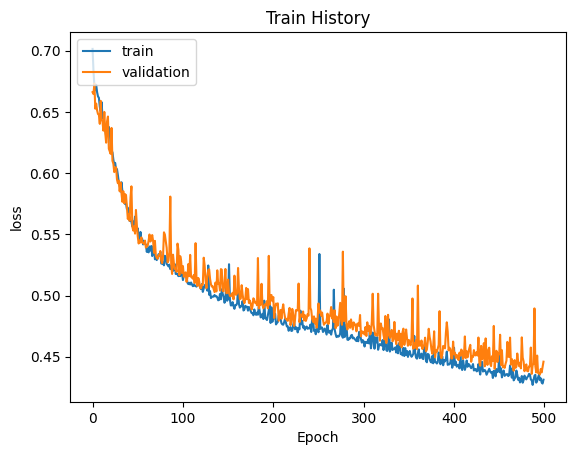

In [8]:
#第二份資料集
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_path = "/content/drive/MyDrive/20230419/Data/Testing2/Training Data_A1.xlsx"
data = pd.read_excel(data_path, index_col=False)
print(data)

import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
ndarray = data.values
ndarray = shuffle(ndarray)
print(ndarray)
df_Features = ndarray[:,3:124]
print(df_Features.shape)
RBC_Label = ndarray[:,125]
RBC_Label[RBC_Label==2]=1
print(np.sum(RBC_Label))
print(RBC_Label)
# one hot encoding
labels = to_categorical(RBC_Label, num_classes=2)
print(labels)

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Dropout, BatchNormalization

#define the model
model=None
model = Sequential()
model.add(Input(shape=(121,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))

print(model.summary())

from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()
std_df_Features = scalar.fit_transform(df_Features)
optimizer = keras.optimizers.Adam(weight_decay=5e-5)
optimizer = keras.optimizers.experimental.SGD(0.2, momentum=0.9)

# compile the model
model.compile(loss='categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])

train_history=None
train_history=model.fit( std_df_Features, labels, validation_split=0.2, epochs=500, batch_size=32, verbose=2)

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        201  198
1        110  440

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing2/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict   0    1
Labels          
0        99  133
1        58  248

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0    1
Labels          
0        41   34
1         5  141

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0    1
Labels          
0        24  106
1        41   87

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict   0    1
Labels          
0        69  131
1        37  144

In [ ]:
path = "/content/drive/MyDrive/20230419/Model/Testing2/"
model.save( path + "A1_RBC.h5" )

In [ ]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# 第三份資料集

          Month Module      ID       400       405       410       415  \
0    2022-08-01     A3    6143  0.176616  0.151590  0.130344  0.117935   
1    2022-09-07     A2    6143  0.153549  0.131392  0.115701  0.099584   
2    2022-09-07     A1    6143  0.000000  0.000000  0.002516  0.009545   
3    2022-08-01     A3    6143  0.176168  0.151297  0.130152  0.117783   
4    2022-08-01     A1    6143  0.000000  0.000000  0.000000  0.002149   
...         ...    ...     ...       ...       ...       ...       ...   
4837 2022-12-01     A1  359647  0.000000  0.003755  0.011916  0.021720   
4838 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
4839 2022-12-01     A1  359647  0.000000  0.005293  0.013913  0.023781   
4840 2022-12-01     A1  359647  0.000000  0.005293  0.013913  0.023781   
4841 2022-12-01     A1  359647  0.000000  0.004270  0.012548  0.022340   

           420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  \
0     0.093648  0.065360  0.047938 

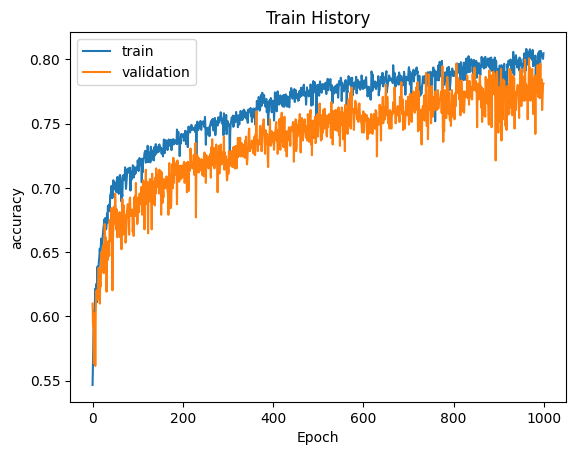

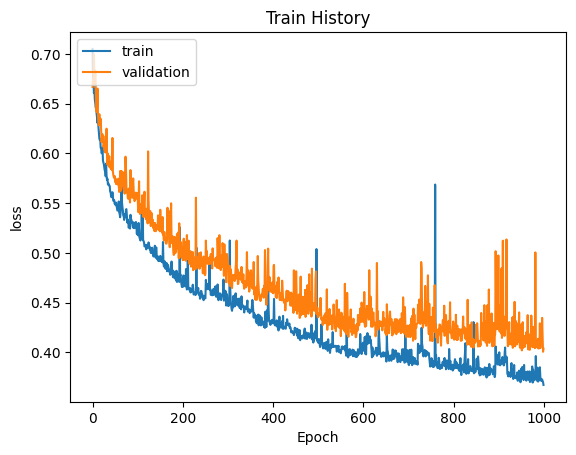

In [ ]:
#第三份資料集
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_path = "/content/drive/MyDrive/20230419/Data/Testing3/Training Data_A1.xlsx"
data = pd.read_excel(data_path, index_col=False)
print(data)

import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
ndarray = data.values
ndarray = shuffle(ndarray)
print(ndarray)
df_Features = ndarray[:,3:124]
print(df_Features.shape)
RBC_Label = ndarray[:,125]
RBC_Label[RBC_Label==2]=1
print(np.sum(RBC_Label))
print(RBC_Label)
# one hot encoding
labels = to_categorical(RBC_Label, num_classes=2)
print(labels)

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Dropout, BatchNormalization

#define the model
model=None
model = Sequential()
model.add(Input(shape=(121,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))

print(model.summary())

from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()
std_df_Features = scalar.fit_transform(df_Features)
optimizer = keras.optimizers.experimental.SGD(0.2, momentum=0.9)

# compile the model
model.compile(loss='categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])

train_history=None
train_history=model.fit( std_df_Features, labels, validation_split=0.2, epochs=1000, batch_size=32, verbose=2)

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict   0    1
Labels          
0        84  315
1        53  497

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing3/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0    1
Labels           
0        127  105
1         72  234

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0    1
Labels          
0         7   68
1        28  118

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0    1
Labels          
0         3  127
1        28  100

In [ ]:
test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict   0    1
Labels          
0        76  124
1         7  174

In [ ]:
path = "/content/drive/MyDrive/20230419/Model/Testing3/"
model.save( path + "A1_RBC.h5" )

In [ ]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model